<a href="https://colab.research.google.com/github/danielruizm16/ComputationalMethods/blob/main/Interpolation/Interpolation_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolation

In [235]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import interp1d,lagrange, CubicHermiteSpline, KroghInterpolator, CubicSpline

# 1.

Use the portion of the given steam table for superheated $\mathrm{H_2O}$ at 200 MPa to:

- Find the corresponding entropy $s$ for a specific volume $v$ of 0.108 $m^3/kg$ with linear interpolation.

- Find the same corresponding entropy using quadratic interpolation (Lagrange polynomial).

- Find the volume corresponding to an entropy of 6.6 using inverse interpolation.

```
v = np.array([0.10377, 0.11144, 0.1254]) # Specific volume data (m³/kg)
s = np.array([6.4147, 6.5453, 6.7664]) # Entropy data (kJ/kg·K)
```

In [236]:
# Given data
v = np.array([0.10377, 0.11144, 0.1254])  # Specific volume data (m³/kg)
s = np.array([6.4147, 6.5453, 6.7664])    # Entropy data (kJ/kg·K)

In [237]:
# Target values
v_target = 0.108  # m³/kg
s_target = 6.6    # kJ/kg·K

In [238]:
def linear_interpolation(xp, yp, x_interp):
    """
    Performs linear interpolation to estimate the y value at a given x point,
    based on a set of known points (xp, yp).
    
    Parameters:
    -----------
    xp : array_like
        Array of known x values (must be sorted in ascending order).
    yp : array_like
        Array of known y values corresponding to the values in xp.
        Must have the same length as xp.
    x_interp : float
        The x-axis value where the interpolated value is desired.
    Returns:
    --------
    float or None
        - The interpolated y value corresponding to x.
        - None if x is outside the range covered by xp.
    Process:
    --------
    1. Finds the interval [xp[i], xp[i+1]] that contains x.
    2. Applies the linear interpolation formula:
       y = yp[i] + (yp[i+1] - yp[i]) * (x - xp[i]) / (xp[i+1] - xp[i])
    3. If x is outside the range of xp, returns None.
    """
    # Basic data verification
    if len(xp) != len(yp):
        raise ValueError("xp and yp must have the same length")
    if len(xp) < 2:
        raise ValueError("At least 2 points are needed for interpolation")
    
    # Find the appropriate interval
    for i in range(len(xp)-1):
        if xp[i] <= x_interp <= xp[i+1]:
            # Calculate slope and intercept for the segment
            slope = (yp[i+1] - yp[i]) / (xp[i+1] - xp[i])
            return yp[i] + slope * (x_interp - xp[i])
    
    # If x_interp is outside the range
    return None

In [239]:
s_linear = linear_interpolation(v, s,v_target)
print(f"Entropy s for v = {v_target} m³/kg using Linear interpolation: s = {s_linear:.4f} kJ/kg·K")

Entropy s for v = 0.108 m³/kg using Linear interpolation: s = 6.4867 kJ/kg·K


## Linear Interpolation using numpy

In [240]:
s_linear_numpy = np.interp(v_target, v, s)
print(f"Entropy s for v = {v_target} m³/kg using Linear interpolation with numpy: s = {s_linear_numpy:.4f} kJ/kg·K")

Entropy s for v = 0.108 m³/kg using Linear interpolation with numpy: s = 6.4867 kJ/kg·K


## Linear Interpolation using scipy

In [241]:
linear_interp_scipy=interp1d(v,s,kind='linear')
s_linear_scipy =linear_interp_scipy(v_target)
print(f"Entropy s for v = {v_target} m³/kg usingl Linear interpolation with scipy: s = {s_linear_scipy:.4f} kJ/kg·K")

Entropy s for v = 0.108 m³/kg usingl Linear interpolation with scipy: s = 6.4867 kJ/kg·K


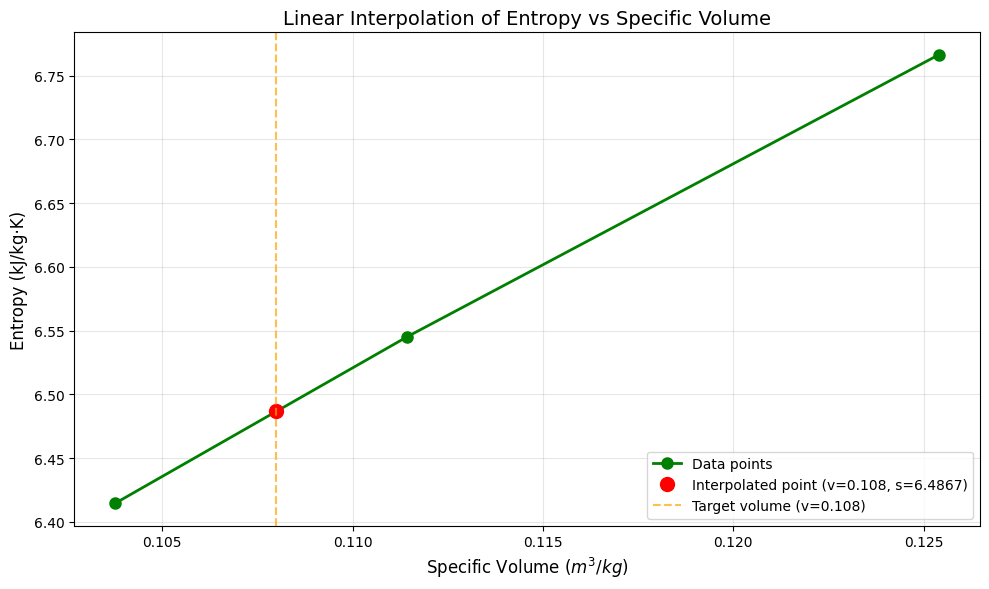

In [242]:
plt.figure(figsize=(10, 6))
plt.plot(v, s, 'go-', linewidth=2, markersize=8, label='Data points')
plt.plot(v_target, s_linear, 'ro', markersize=10, label=f'Interpolated point (v={v_target}, s={s_linear:.4f})')
plt.axvline(x=v_target, color='orange', linestyle='--', alpha=0.7, label=f'Target volume (v={v_target})')
plt.xlabel(r'Specific Volume ($m^3/kg$)', fontsize=12)
plt.ylabel('Entropy (kJ/kg·K)', fontsize=12)
plt.title('Linear Interpolation of Entropy vs Specific Volume', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [243]:
def quadratic_interpolation(x_data, y_data, x):
    """
    Perform quadratic interpolation using Lagrange polynomial method with all three data points.
    
    Parameters:
    x_data : array_like
        Array of three x-coordinates of known data points [x0, x1, x2]
    y_data : array_like  
        Array of three y-coordinates of known data points [y0, y1, y2]
    x : float
        The x-value at which to evaluate the interpolating polynomial
        
    Returns:
    float
        The interpolated y-value at the given x
        
    Notes:
    - Requires exactly 3 data points (quadratic interpolation)
    """

    result = 0
    for i in range(3):
        term = y_data[i]
        for j in range(3):
            if i != j:
                term *= (x - x_data[j]) / (x_data[i] - x_data[j])
        result += term
    return result


In [244]:
s_quadratic = quadratic_interpolation(v, s, v_target)
print(f"Entropy s for v = {v_target} m³/kg usingl Quadratic interpolation: s = {s_quadratic:.4f} kJ/kg·K")

Entropy s for v = 0.108 m³/kg usingl Quadratic interpolation: s = 6.4875 kJ/kg·K


In [245]:
v_inverse = quadratic_interpolation(s, v, s_target)
print(f"Volume v for s = {s_target}: v = {v_inverse:.5f} m³/kg")

Volume v for s = 6.6: v = 0.11478 m³/kg


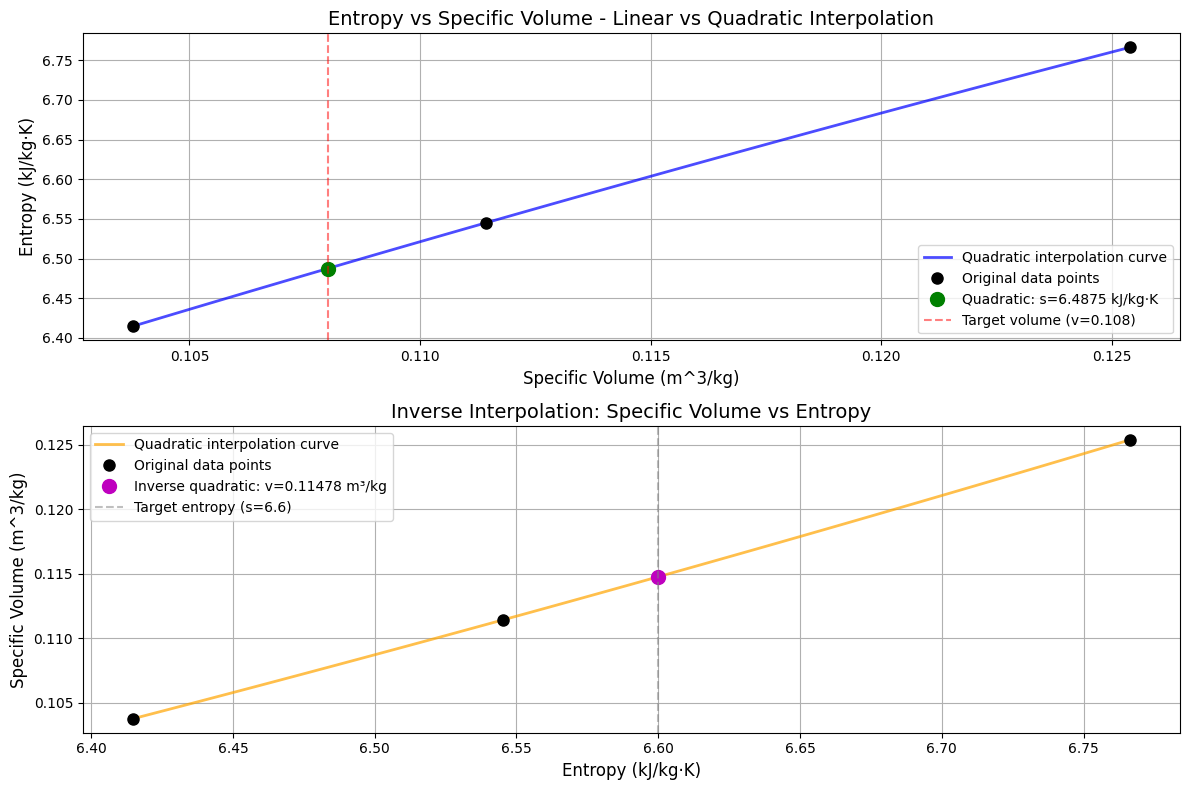

In [246]:
# Create comprehensive plot
plt.figure(figsize=(12, 8))

# Generate smooth curves for visualization
v_vals = np.linspace(v.min(), v.max(), 100)
s_quad_vals = [quadratic_interpolation(v, s, x) for x in v_vals]

# Plot 1: Entropy vs Volume 
plt.subplot(2, 1, 1)

# Plot smooth quadratic curve
plt.plot(v_vals ,s_quad_vals, 'b-', alpha=0.7, linewidth=2, label='Quadratic interpolation curve')

# Plot original data points
plt.plot(v, s, 'ko', markersize=8, label='Original data points')

# Plot quadratic interpolation result  
plt.plot(v_target, s_quadratic, 'go', markersize=10,
         label=f'Quadratic: s={s_quadratic:.4f} kJ/kg·K')

# Add reference lines
plt.axvline(x=v_target, color='red', linestyle='--', alpha=0.5, label=f'Target volume (v={v_target})')

# Customize subplot 1
plt.xlabel(r'Specific Volume (m^3/kg)', fontsize=12)
plt.ylabel('Entropy (kJ/kg·K)', fontsize=12)
plt.title('Entropy vs Specific Volume - Linear vs Quadratic Interpolation', fontsize=14)
plt.grid()
plt.legend()

# Plot 2: Volume vs Entropy (inverse interpolation)
plt.subplot(2, 1, 2)

# Generate smooth curve for inverse relationship
s_vals = np.linspace(s.min(),s.max(), 100)
v_quad_vals = [quadratic_interpolation(s, v, x) for x in s_vals]

# Plot smooth quadratic curve
plt.plot(s_vals, v_quad_vals, 'orange', alpha=0.7, linewidth=2, label='Quadratic interpolation curve')

# Plot original data points
plt.plot(s, v, 'ko', markersize=8, label='Original data points')

# Plot inverse interpolation result
plt.plot(s_target, v_inverse, 'mo', markersize=10,
         label=f'Inverse quadratic: v={v_inverse:.5f} m³/kg')

plt.axvline(x=s_target, color='gray', linestyle='--', alpha=0.5, label=f'Target entropy (s={s_target})')

# Customize subplot 2
plt.xlabel('Entropy (kJ/kg·K)', fontsize=12)
plt.ylabel(r'Specific Volume (m^3/kg)', fontsize=12)
plt.title('Inverse Interpolation: Specific Volume vs Entropy', fontsize=14)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# 2.

From an experiment, the heat conduction coefficient $k$ of an aluminum material varies with temperature $T$ como se muestra en la tabla. as shown in the table. Derive the Lagrange interpolation polynomial to estimate the values of the heat conduction coefficient at $ 50^\circ C $ and $ 250^\circ C$.

```
T = np.array([-100, 0, 100, 200, 300, 400]) # Temperatures in °C
k = np.array([215, 202, 206, 215, 228, 249]) # Heat conduction coefficients in W/(m·°C)
```

In [247]:
def lagrange_interpolation(x_data, y_data, x_interp):
    """
    Lagrange interpolation to estimate y at x_interp
    
    Parameters:
    x_data: array of known x values
    y_data: array of known y values
    x_interp: x value where interpolation is desired
    
    Returns:
    y_interp: interpolated value at x_interp
    """
    n = len(x_data)
    y_interp = 0.0
    
    for i in range(n):
        # Calculate the Lagrange basis term L_i(x)
        term = y_data[i]
        for j in range(n):
            if j != i:
                term *= (x_interp - x_data[j]) / (x_data[i] - x_data[j])
        y_interp += term
    
    return y_interp

In [248]:
# Problem data
T = np.array([-100, 0, 100, 200, 300, 400])  # Temperatures in °C
k = np.array([215, 202, 206, 215, 228, 249])  # Coefficients in W/(m·°C)

In [249]:
# Points to interpolate
T_interp = [50, 250]

In [250]:
# Calculate interpolations
results = {}
for temp in T_interp:
    results[temp] = lagrange_interpolation(T, k, temp)

# Display results
for temp, k_val in results.items():
    print(f"k({temp}°C) = {k_val:.2f} W/(m·°C)")

k(50°C) = 202.95 W/(m·°C)
k(250°C) = 220.80 W/(m·°C)


In [251]:
# Temperature range for plotting
T_plot = np.linspace(-150, 400, 100)
k_plot = [lagrange_interpolation(T, k, t) for t in T_plot]

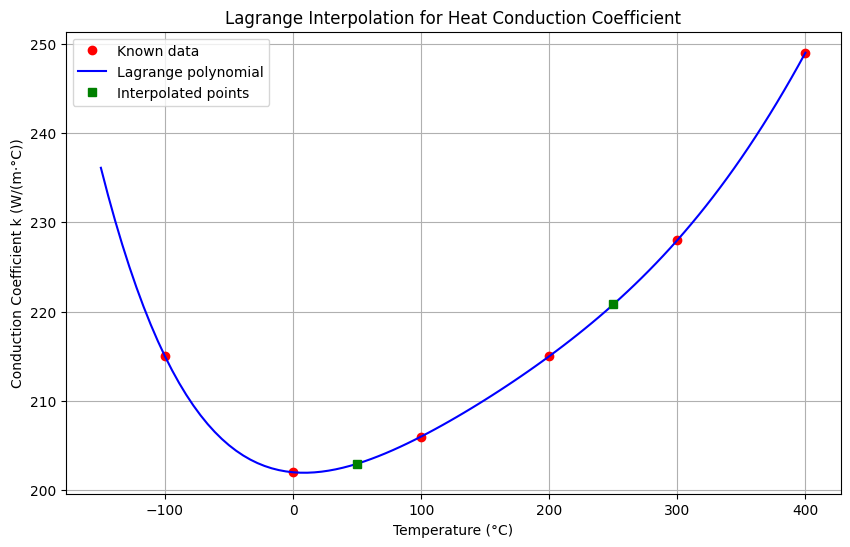

In [252]:
# Original points and interpolated points
plt.figure(figsize=(10, 6))
plt.plot(T, k, 'ro', label='Known data')
plt.plot(T_plot, k_plot, 'b-', label='Lagrange polynomial')
plt.plot(T_interp, list(results.values()), 'gs', label='Interpolated points')
plt.title('Lagrange Interpolation for Heat Conduction Coefficient')
plt.xlabel('Temperature (°C)')
plt.ylabel('Conduction Coefficient k (W/(m·°C))')
plt.legend()
plt.grid()
plt.show()

# 3.

The decrease in temperature due to wind (wind chill) depends on wind speed. A data set of temperature varying with wind speed is shown in the following table. Use Newton's divided difference method to estimate the temperature at a wind speed of 35 km/h. Based on the provided data, is it possible for the temperature to drop below -50 °C? If possible, find the wind speed that causes such a temperature.

```
wind_speed = np.array([0, 10, 20, 30, 40, 50]) # Wind speed (km/h)
temperature = np.array([-12, -23, -31, -36, -38, -39]) # Temperature (°C)
```

In [253]:
def newton_interpolation(x_data, y_data, x_interp):
    """
    Newton interpolation polynomial using divided differences.
    Follows the formula:
    P(x) = f[x0] + f[x0,x1](x-x0) + f[x0,x1,x2](x-x0)(x-x1) + ...
    
    Parameters:
    -----------
    x_data : list or array
        Known x points
    y_data : list or array  
        Known y values
    x_interp : float
        Point where we want to evaluate the polynomial
        
    Returns:
    --------
    float
        Interpolated value at x_interp
    """
    n = len(x_data)
    
    # Calculate divided differences
    def divided_diff(xs, ys):
        """Calculate divided differences recursively"""
        if len(xs) == 1:
            return ys[0]
        return (divided_diff(xs[1:], ys[1:]) - divided_diff(xs[:-1], ys[:-1])) / (xs[-1] - xs[0])
    
    # Evaluate polynomial using the explicit formula
    result = y_data[0]  # First term: f[x0]
    product_term = 1.0
    
    for i in range(1, n):
        # Build product: (x - x0)(x - x1)...(x - x_{i-1})
        product_term *= (x_interp - x_data[i-1])
        
        # Get divided difference coefficient
        coeff = divided_diff(x_data[0:i+1], y_data[0:i+1])
        
        # Add term: coefficient × product
        result += coeff * product_term
    
    return result

In [254]:
# Provided data
wind_speed = np.array([0, 10, 20, 30, 40, 50])  # km/h
temperature = np.array([-12, -23, -31, -36, -38, -39])  # °C

# 1. Estimation at 35 km/h
temp_35 = newton_interpolation(wind_speed, temperature, 35)
print(f"Estimated temperature at 35 km/h: {temp_35:.2f} °C")

Estimated temperature at 35 km/h: -37.32 °C


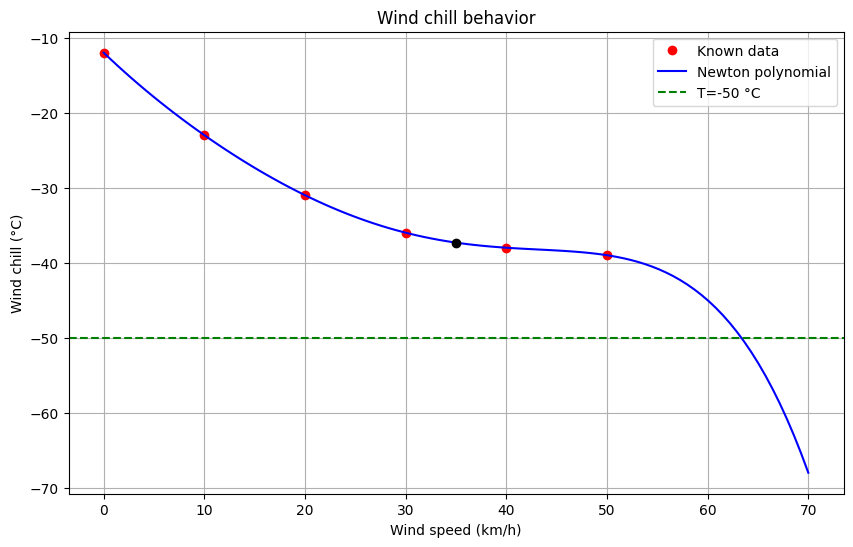

In [255]:
# Extended range for visualization
wind_speed_ext = np.linspace(0, 70, 100)
temp_ext = [newton_interpolation(wind_speed, temperature, v) for v in wind_speed_ext]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(wind_speed, temperature, 'ro', label='Known data')
plt.plot(wind_speed_ext, temp_ext, 'b-', label='Newton polynomial')
plt.plot(35,temp_35,'ko')
plt.axhline(y=-50, color='g', linestyle='--', label='T=-50 °C')
plt.xlabel('Wind speed (km/h)')
plt.ylabel('Wind chill (°C)')
plt.title('Wind chill behavior')
plt.legend()
plt.grid()
plt.show()

In [256]:
from scipy.optimize import newton

# Objective function to find the root (T(v) + 50 = 0)
def func(v):
    return newton_interpolation(wind_speed, temperature, v) + 50

# Initial estimate based on trend
v_guess = 60  # km/h (initial value for search)

critical_speed = newton(func, v_guess)

print(f"\nTemperature reaches -50 °C at approximately {critical_speed:.2f} km/h")

# Verification
temp_verification = newton_interpolation(wind_speed, temperature, critical_speed)
print(f"Verified temperature at {critical_speed:.2f} km/h: {temp_verification:.6f} °C")


Temperature reaches -50 °C at approximately 63.35 km/h
Verified temperature at 63.35 km/h: -50.000000 °C


# 4.
The following data describe the pressure (kPa) versus altitude from sea level according to the U.S. Standard Atmosphere:
```
altitude = np.array([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]) # in m
pressure = np.array([101.33, 89.88, 79.50, 70.12, 61.66, 54.05, 47.22, 41.11, 35.65, 30.80, 26.50]) # in kPa
```

Using both a Hermite polynomial and Cubic Splines, determine the pressure at the summit of Mount Everest.

In [257]:
# Provided data
altitude = np.array([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]) # in m
pressure = np.array([101.33, 89.88, 79.50, 70.12, 61.66, 54.05, 47.22, 41.11, 35.65, 30.80, 26.50]) # in kPa

# Mount Everest altitude in meters
everest = 8848.86

## Cubic Splines

In [258]:
# Create the cubic spline
cubic_spline = CubicSpline(altitude, pressure, bc_type='natural')

# Evaluate at Everest's altitude
pressure_spline = cubic_spline(everest)

print(f"Pressure on Everest (Cubic Splines): {pressure_spline:.2f} kPa")

Pressure on Everest (Cubic Splines): 31.49 kPa


## Hermite

In [259]:
def hermite_interpolation(x_points, y_points, derivatives, x_interp):
    """
    Hermite interpolation to estimate y at x_interp using sympy
    
    Args:
        x_points (list): List of x points where function is evaluated
        y_points (list): List of f(x) values at the points  
        derivatives (list): List of f'(x) derivatives at the points
        x_interp (float): x value where interpolation is desired
    
    Returns:
        float: interpolated value at x_interp
    """
    x = sp.symbols('x')
    n = len(x_points)
    H = 0.0
    
    for i in range(n):
        # Lagrange basis h_i(x)
        h_i = 1
        for j in range(n):
            if j != i:
                h_i *= (x - x_points[j]) / (x_points[i] - x_points[j])
        
        # Derivative of h_i at x_i using sympy
        h_i_prime = sp.diff(h_i, x).subs(x, x_points[i])
        
        # Hermite terms
        term1 = (h_i**2) * (1 - 2 * (x - x_points[i]) * h_i_prime) * y_points[i]
        term2 = (h_i**2) * (x - x_points[i]) * derivatives[i]
        
        H += term1 + term2
    
    # Evaluate at the interpolation point
    return H.subs(x, x_interp)

In [260]:
# Calculate approximate derivatives using finite differences
derivatives = np.gradient(pressure, altitude)

# Evaluate at Everest's altitude
pressure_hermite=hermite_interpolation(altitude,pressure,derivatives,everest)


print(f"Pressure on Everest (Hermite): {pressure_hermite:.2f} kPa")

Pressure on Everest (Hermite): 31.43 kPa


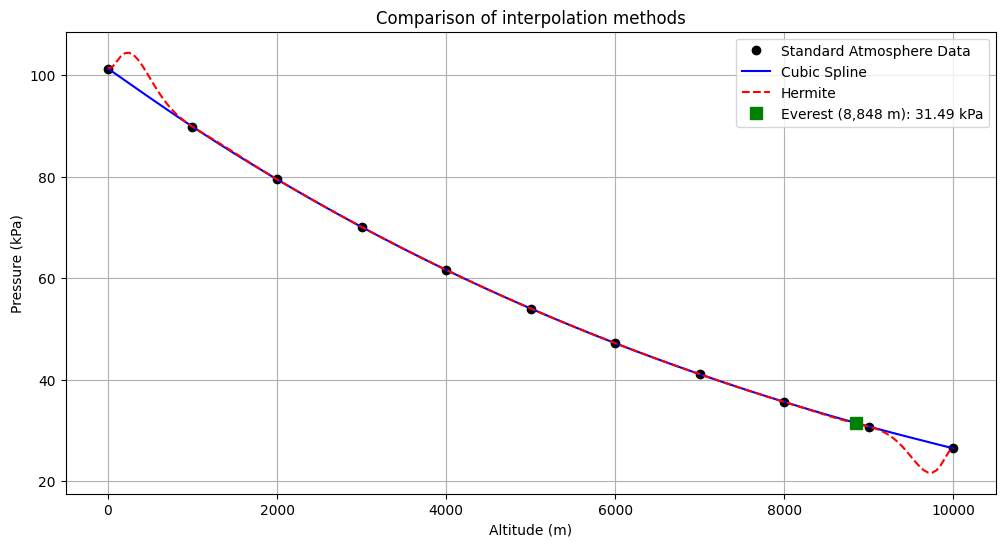

In [261]:
# Create a range for plotting
altitude_plot = np.linspace(0, 10000, 200)

# Comparative plot
plt.figure(figsize=(12, 6))
plt.plot(altitude, pressure, 'ko', label='Standard Atmosphere Data')
plt.plot(altitude_plot, cubic_spline(altitude_plot), 'b-', label='Cubic Spline')
plt.plot(altitude_plot,np.array([hermite_interpolation(altitude,pressure,derivatives,x) for x in altitude_plot]), 'r--', label='Hermite')
plt.plot(everest, pressure_spline, 'gs', markersize=8, 
         label=f'Everest (8,848 m): {pressure_spline:.2f} kPa')
plt.xlabel('Altitude (m)')
plt.ylabel('Pressure (kPa)')
plt.title('Comparison of interpolation methods')
plt.legend()
plt.grid()
plt.show()

# 5.
In nuclear physics, the scattering cross section is calculated from collision experiments. It is known from theory that the cross section is described by the Breit-Wigner formula,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

where $E$ is the energy and $E_r,\sigma_0, \Gamma$ are parameters to be adjusted; the predicted value is $(E_r,\Gamma) = (78, 55)$ MeV; where $\sigma_0$ can now be calculated from the formula by simply replacing any pair of points from the table.

From the energy values:


```
Energy = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
```

- Calculate the Lagrange, Newton, and Hermite polynomials.
- Create a plot of the polynomials together with the function.
- Finally, from the difference $|f(x) - P_n(x)|$ calculate the error associated with each of them. Which one will be the best?

In [262]:
# Given data
Energy = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

# Breit-Wigner formula parameters
Er, Gamma = 78, 55  # MeV


# Calculate sigma0 using the point (75, 83.5) as suggested
E_point, sigma_point = 75, 83.5
sigma0 = sigma_point * ((E_point - Er)**2 + Gamma**2/4)

In [263]:
def breit_wigner(E):
    return sigma0 / ((E - Er)**2 + Gamma**2/4)

In [264]:
# Derivative of Breit-Wigner formula
def breit_wigner_derivative(E):
    return -2*sigma0*(E - Er) / ((E - Er)**2 + Gamma**2/4)**2

# Calculate exact derivatives at data points
exact_derivatives = breit_wigner_derivative(Energy)

In [265]:
# 1. Lagrange interpolation using scipy
lagrange_poly = lagrange(Energy, sigma_exp)

In [266]:
# 2. Hermite interpolation with exact derivatives (Piecewise Function) 
exact_derivatives = breit_wigner_derivative(Energy)
hermite_poly_pw = CubicHermiteSpline(Energy, sigma_exp, exact_derivatives)

In [267]:
# Hermite interpolation with exact derivatives (Hermite Polynomial based on divided differences) 
yi_krogh = np.column_stack([sigma_exp, exact_derivatives])
hermite_poly=KroghInterpolator(Energy, yi_krogh)

In [268]:
# 3. Krogh interpolation (Newton Interpolation)
newton_poly = KroghInterpolator(Energy, sigma_exp)

In [269]:
# Evaluation points (fine grid between data points)
x_fine = np.linspace(0, 200, 500)

In [270]:
# Calculate true function and interpolations on fine grid
true_vals = breit_wigner(x_fine)
lagrange_vals = lagrange_poly(x_fine)
hermite_vals = hermite_poly_pw(x_fine)
newton_vals = newton_poly(x_fine)


In [271]:
# Calculate errors |f(x) - P(x)| on fine grid
lagrange_errors = np.abs(true_vals - lagrange_vals)
hermite_errors = np.abs(true_vals - hermite_vals)
barycentric_errors = np.abs(true_vals - newton_vals)

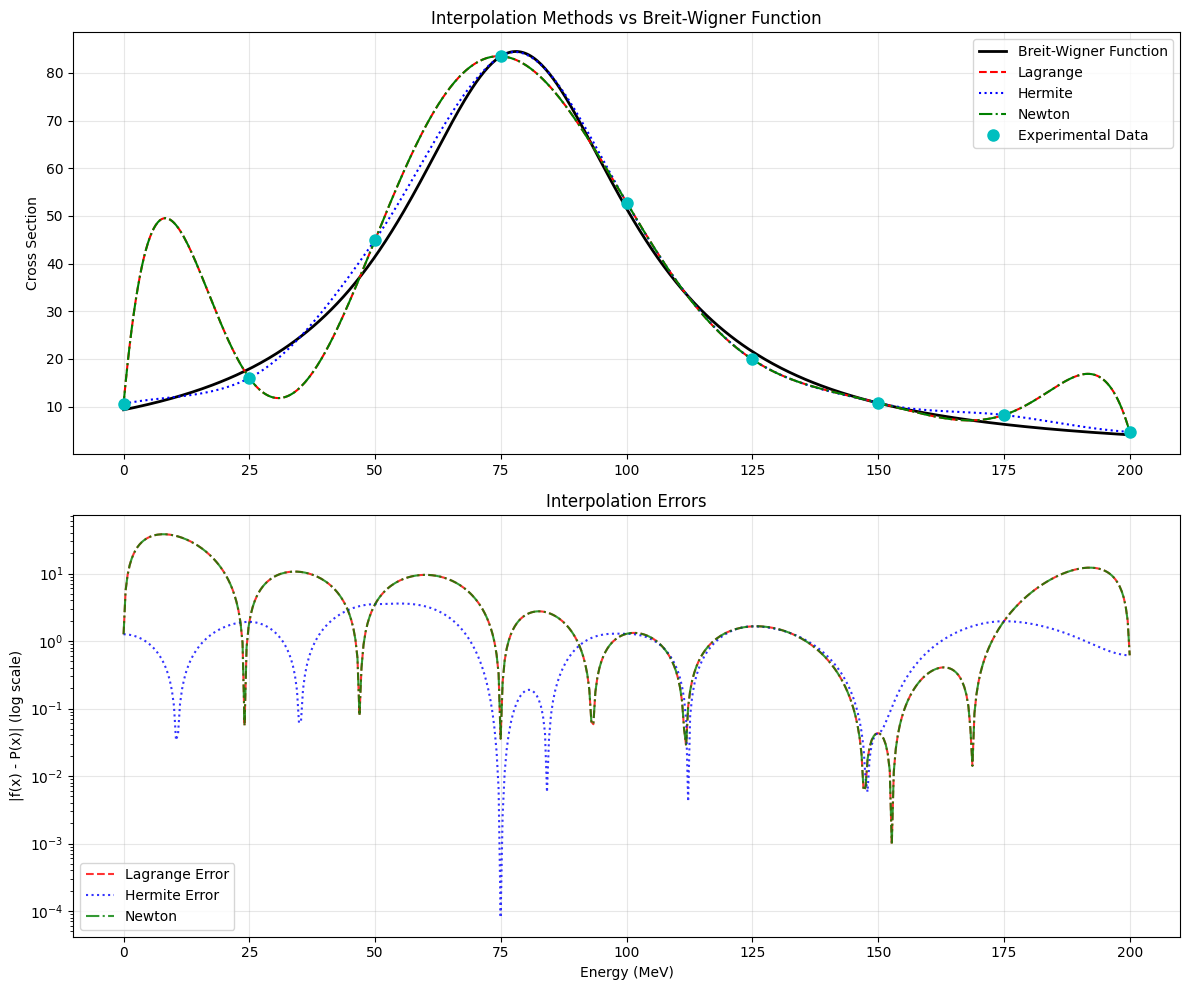

In [272]:
# Plot 1: Interpolations vs true function
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(x_fine, true_vals, 'k-', linewidth=2, label='Breit-Wigner Function')
plt.plot(x_fine, lagrange_vals, 'r--', linewidth=1.5, label='Lagrange')
plt.plot(x_fine, hermite_vals, 'b:', linewidth=1.5, label='Hermite')
plt.plot(x_fine, newton_vals, 'g-.', linewidth=1.5, label='Newton')
plt.plot(Energy, sigma_exp, 'co', markersize=8, label='Experimental Data')
plt.ylabel('Cross Section')
plt.title('Interpolation Methods vs Breit-Wigner Function')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Errors on fine grid
plt.subplot(2, 1, 2)
plt.semilogy(x_fine, lagrange_errors, 'r--', label='Lagrange Error', alpha=0.8)
plt.semilogy(x_fine, hermite_errors, 'b:', label='Hermite Error', alpha=0.8)
plt.semilogy(x_fine, barycentric_errors, 'g-.', label='Newton', alpha=0.8)
plt.xlabel('Energy (MeV)')
plt.ylabel('|f(x) - P(x)| (log scale)')
plt.title('Interpolation Errors')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
